In [24]:
import pandas as pd
import scanpy as sc

In [25]:
%%R
library(Seurat)
library(SeuratDisk)

UsageError: Cell magic `%%R` not found.


In [26]:
adata = "/Users/jamesbolepan/Documents/research_LiverStress_Immune/rds_manual_extract/liver_liveTissue_RNA.h5ad"
adata = sc.read_h5ad(adata)
adata

AnnData object with n_obs × n_vars = 23819 × 19413
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_name', 'exp', 'diet', 'age', 'organ', 'mouse_number', 'mouse_and_organ', 'percent.mt', 'celltypes_NicheNet', 'celltypes_figure2plot', 'Age.Diet'

In [27]:
# subsample adata.X
sc.pp.subsample(adata, fraction=0.9, copy=False)

In [28]:
adata

AnnData object with n_obs × n_vars = 21437 × 19413
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_name', 'exp', 'diet', 'age', 'organ', 'mouse_number', 'mouse_and_organ', 'percent.mt', 'celltypes_NicheNet', 'celltypes_figure2plot', 'Age.Diet'

In [29]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

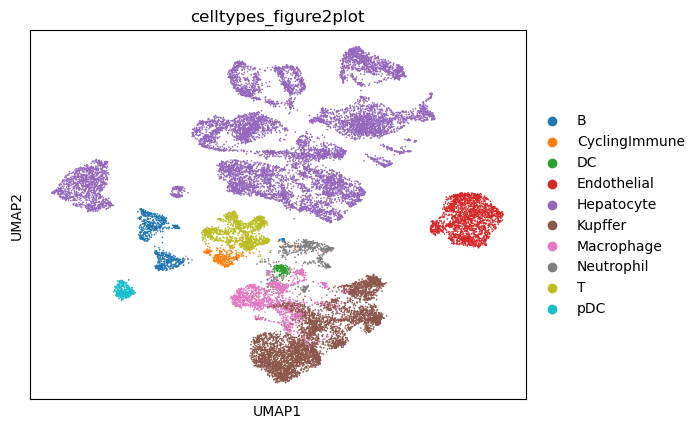

In [30]:
# Plotting the UMAP
sc.pl.umap(adata, color=["celltypes_figure2plot"])

let's do Leidan clustering

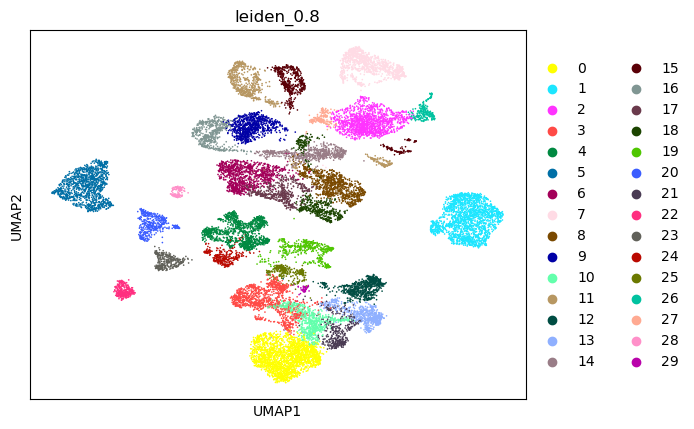

In [31]:
sc.tl.leiden(adata, resolution=0.8, key_added="leiden_0.8")
sc.pl.umap(adata, color=["leiden_0.8"])

We are not sure how good this resolution is. We might consider other resolutions later. 

We will the get marker genes

In [20]:
sc.tl.rank_genes_groups(adata, groupby="leiden_0.8", method="t-test")

/Users/jamesbolepan/miniforge3/envs/newmac_liver_1/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/Users/jamesbolepan/miniforge3/envs/newmac_liver_1/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/Users/jamesbolepan/miniforge3/envs/newmac_liver_1/lib/python3.12/site-packages

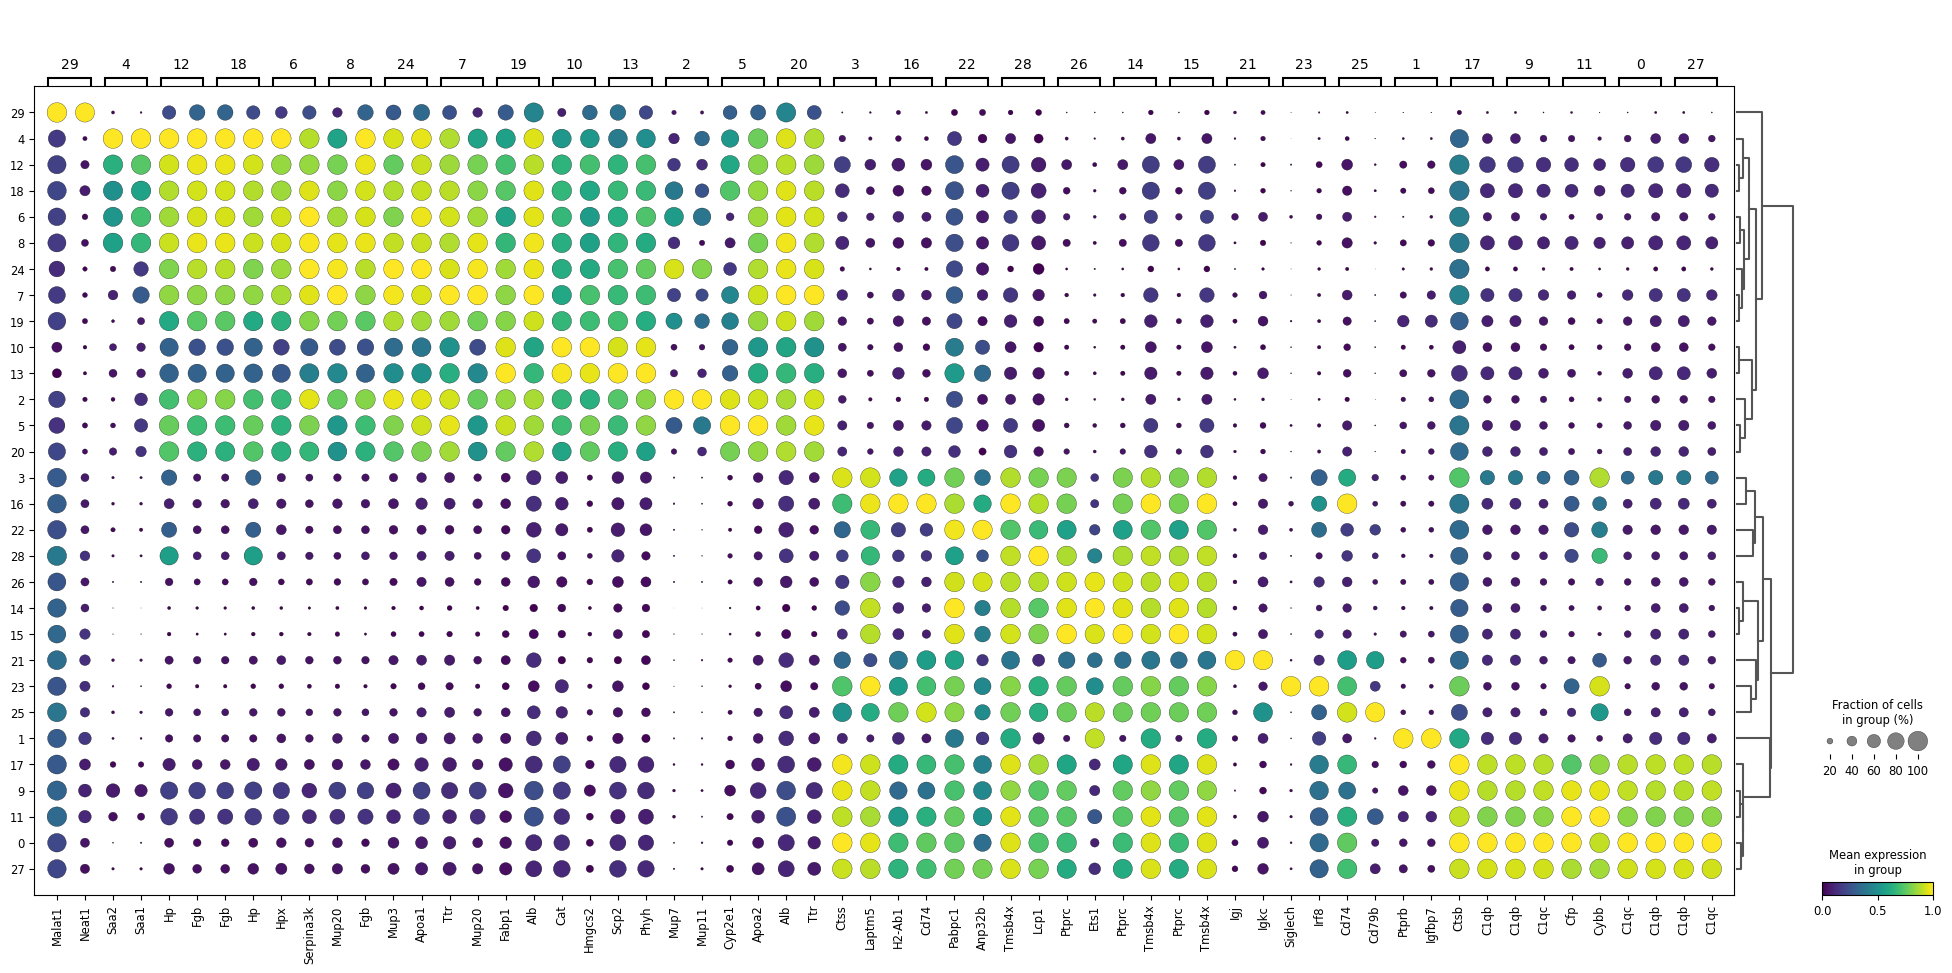

In [21]:
sc.pl.rank_genes_groups_dotplot(adata, groupby="leiden_0.8", n_genes=2, dendrogram=True, standard_scale="var", cmap="viridis")